In [12]:
!pip install --pre pycaret
from pycaret.classification import *
import pandas as pd
import numpy as np
import seaborn as sns
!pip install matplotlib==3.1.3
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")

test_df = pd.read_csv('/content/test.csv')
train_df = pd.read_csv('/content/train.csv')

print(train_df.shape)
print(test_df.shape) #test_df가 열 개수가 하나 더 적은 이유는 nerdiness 열이 없기 때문에.

train_df = train_df.iloc[:,1:] #앞에 인덱스 행 제거
train_df.head()
print(train_df.shape)

train_df.head() #인덱스 제거된거 확인!

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.5.3-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 3.0.0rc3 requires matplotlib>=3.3.0, but you have matplotlib 3.1.3 which is incompatible.


(15000, 70)
(35452, 69)
(15000, 69)


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0


In [13]:
train_df.isnull().sum() #null data 확인

Q1             41
Q2             69
Q3             50
Q4             71
Q5             38
             ... 
voted          85
married        82
familysize    319
ASD            89
nerdiness       0
Length: 69, dtype: int64

In [14]:
#Q문항 답이 모두 비어있는 경우 행을 삭제
train_df=train_df.drop(207, axis=0)  #axis=0: index값으로 지정
train_df=train_df.drop(5382, axis=0)
train_df=train_df.drop(7533, axis=0)
train_df=train_df.drop(9010, axis=0)
train_df=train_df.drop(10446, axis=0)
train_df=train_df.drop(13016, axis=0)
train_df=train_df.drop(13189, axis=0)
train_df=train_df.drop(13676, axis=0)

In [15]:
#IQR 이상치 탐지 방법으로 탐지 및 제거(introelapse, testelapse, surveyelapse에만 적용, age와 familysize는 자체적으로 기준 정함)
q3 = train_df.quantile(0.75)
q1 = train_df.quantile(0.25)
IQR = q3-q1

def is_introelapse_outlier(train_df):
  df = train_df['introelapse']
  if df > q3['introelapse'] + 1.5*IQR['introelapse'] or df < q1['introelapse']-1.5*IQR['introelapse']:
    return True
  else:
    return False

def is_testelapse_outlier(train_df):
  df = train_df['testelapse']
  if df > q3['testelapse'] + 1.5*IQR['testelapse'] or df < q1['testelapse']-1.5*IQR['testelapse']:
    return True
  else:
    return False

def is_surveyelapse_outlier(train_df):
  df = train_df['surveyelapse']
  if df > q3['surveyelapse'] + 1.5*IQR['surveyelapse'] or df < q1['surveyelapse']-1.5*IQR['surveyelapse']:
    return True
  else:
    return False

train_df['introelapse_이상치여부'] = train_df.apply(is_introelapse_outlier, axis =1 )
train_df['testelapse_이상치여부'] = train_df.apply(is_testelapse_outlier, axis =1 )
train_df['surveyelapse_이상치여부'] = train_df.apply(is_surveyelapse_outlier, axis =1 )
train_df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,religion,orientation,voted,married,familysize,ASD,nerdiness,introelapse_이상치여부,testelapse_이상치여부,surveyelapse_이상치여부
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,12.0,4.0,2.0,1.0,4.0,2.0,1,False,True,False
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,2.0,1.0,1.0,2.0,4.0,2.0,1,False,False,False
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,2.0,2.0,2.0,3.0,4.0,2.0,1,False,False,False
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,1.0,1.0,2.0,1.0,2.0,2.0,1,False,False,False
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,12.0,1.0,2.0,1.0,1.0,2.0,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1.0,3.0,2.0,1.0,3.0,2.0,0,False,False,False
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,3.0,1.0,1.0,2.0,3.0,2.0,1,False,False,False
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1.0,2.0,1.0,1.0,3.0,1.0,1,False,False,False
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,12.0,4.0,2.0,2.0,2.0,1.0,0,False,False,False


In [16]:
#이상치 있는 행은 제거하여 필터링 
df = train_df.loc[train_df['introelapse_이상치여부']==False]
df = train_df.loc[train_df['testelapse_이상치여부']==False]
df = train_df.loc[train_df['surveyelapse_이상치여부']==False]

del df['introelapse_이상치여부']
del df['testelapse_이상치여부']
del df['surveyelapse_이상치여부']

df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,...,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,...,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,...,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,...,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0


In [17]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
count,14061.000000,14032.000000,14052.000000,14034.000000,14063.000000,14056.000000,14026.000000,14053.000000,14044.000000,14039.000000,...,14048.000000,14091.000000,14048.000000,13869.000000,13717.000000,14011.000000,14015.000000,13798.000000,14007.000000,14091.000000
mean,3.971624,4.067061,4.224737,3.796067,3.855792,3.687038,4.177527,3.888280,3.915765,4.108127,...,1.336062,26.877794,1.184154,4.058115,1.852227,1.631932,1.179451,2.757429,1.938388,0.553900
std,1.094915,1.170331,1.021381,1.218762,1.196328,1.165137,1.062401,1.295743,1.118594,1.045954,...,0.472377,327.112160,0.479270,3.416261,1.222047,0.482297,0.466494,24.866712,0.240458,0.497104
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,...,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000
50%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,...,1.000000,20.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,2.000000,27.000000,1.000000,6.000000,2.000000,2.000000,1.000000,3.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,2.000000,38822.000000,3.000000,12.000000,5.000000,2.000000,3.000000,2919.000000,2.000000,1.000000


In [18]:
df=df[df.age<120]
df=df[df.familysize < 11]

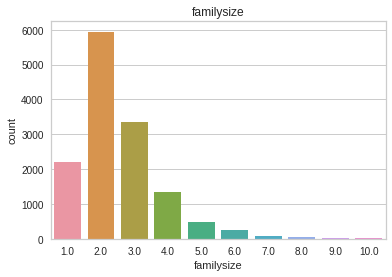

In [19]:
sns.countplot(x='familysize', data=df)
plt.title("familysize")
plt.show()  #familysize는 정상적으로 이상치 제거됨 

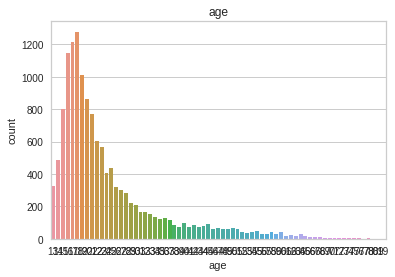

In [20]:
sns.countplot(x='age', data=df)
plt.title("age")
plt.show()

In [21]:
#결측치 있는 경우, 열의 평균을 반올림(?)해서 채우기
train_df=train_df.fillna(train_df.mean())
train_df=train_df.round()
train_df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
count,14992.000000,14992.000000,14992.000000,14992.000000,14992.000000,14992.000000,14992.000000,14992.000000,14992.000000,14992.000000,...,14992.000000,14992.000000,14992.000000,14992.000000,14992.000000,14992.000000,14992.000000,14992.000000,14992.000000,14992.000000
mean,3.972919,4.065435,4.222185,3.796358,3.856790,3.677228,4.182431,3.879336,3.915688,4.110125,...,1.344851,26.745998,1.184432,4.096251,1.851654,1.635072,1.178895,2.749400,1.939034,0.553495
std,1.094708,1.167307,1.021969,1.217446,1.194442,1.169542,1.057422,1.300357,1.115845,1.045403,...,0.475335,317.142938,0.481188,3.397155,1.206626,0.481426,0.464769,23.857949,0.239276,0.497147
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,...,1.000000,17.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000
50%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,...,1.000000,20.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,2.000000,27.000000,1.000000,6.000000,2.000000,2.000000,1.000000,3.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,2.000000,38822.000000,3.000000,12.000000,5.000000,2.000000,3.000000,2919.000000,2.000000,1.000000


In [22]:
train_df.isnull().sum()
#null data없어진거 확인
#Q의 모든 문항 답변이 없는 경우 행 삭제
#결측값을 평균으로 대체하여 채움

Q1                    0
Q2                    0
Q3                    0
Q4                    0
Q5                    0
                     ..
ASD                   0
nerdiness             0
introelapse_이상치여부     0
testelapse_이상치여부      0
surveyelapse_이상치여부    0
Length: 72, dtype: int64

Q의 모든 문항 답변이 없는 경우 행 삭제

결측값을 평균으로 대체하여 채움

In [23]:
#######train이랑 test사본 만듦#########
newdf = df.copy()
final_test_df = test_df.copy()

In [24]:
#train, test data모두 age(연속형 변수)를 범주화!! 
newdf['Age_band']=0
newdf.loc[newdf['age']<10, 'Age_band']=0
newdf.loc[(newdf['age']>=10)&(newdf['age']<20), 'Age_band']=1
newdf.loc[(newdf['age']>=20)&(newdf['age']<30), 'Age_band']=2
newdf.loc[(newdf['age']>=30)&(newdf['age']<40), 'Age_band']=3
newdf.loc[(newdf['age']>=40)&(newdf['age']<50), 'Age_band']=4
newdf.loc[(newdf['age']>=50)&(newdf['age']<60), 'Age_band']=5
newdf.loc[(newdf['age']>=60)&(newdf['age']<70), 'Age_band']=6
newdf.loc[(newdf['age']>=70)&(newdf['age']<80), 'Age_band']=7
newdf.loc[newdf['age']>=80, 'Age_band']=8
newdf.head(2)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness,Age_band
0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,...,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1,2
1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,...,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1,4


In [25]:
final_test_df['Age_band']=0
final_test_df.loc[final_test_df['age']<10, 'Age_band']=0
final_test_df.loc[(final_test_df['age']>=10)&(final_test_df['age']<20), 'Age_band']=1
final_test_df.loc[(final_test_df['age']>=20)&(final_test_df['age']<30), 'Age_band']=2
final_test_df.loc[(final_test_df['age']>=30)&(final_test_df['age']<40), 'Age_band']=3
final_test_df.loc[(final_test_df['age']>=40)&(final_test_df['age']<50), 'Age_band']=4
final_test_df.loc[(final_test_df['age']>=50)&(final_test_df['age']<60), 'Age_band']=5
final_test_df.loc[(final_test_df['age']>=60)&(final_test_df['age']<70), 'Age_band']=6
final_test_df.loc[(final_test_df['age']>=70)&(final_test_df['age']<80), 'Age_band']=7
final_test_df.loc[final_test_df['age']>=80, 'Age_band']=8

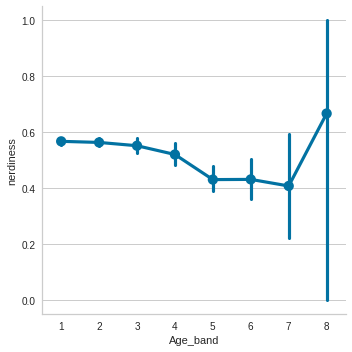

In [26]:
newdf['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')
sns.factorplot('Age_band', 'nerdiness', data=newdf)
plt.show()

In [27]:
#Q 합계 VCL 합계
import pandas as pd
q_data = newdf.iloc[:,0:26]

q_data = q_data.sum(axis=1)

new_df = pd.concat([q_data], axis = 1)
newdf = pd.concat([newdf, new_df],axis = 1)
newdf.rename(columns = {0:'q_sum'}, inplace = True)

newdf = newdf.reindex(columns = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'Age_band', 'hand', 'religion', 'orientation',
       'voted', 'married', 'familysize', 'ASD', 'q_sum', 'nerdiness'])
print(newdf.columns)

#Q 합계 VCL 합계
q_data = final_test_df.iloc[:,0:26]

q_data = q_data.sum(axis=1)

new_df = pd.concat([q_data], axis = 1)
final_test_df = pd.concat([final_test_df, new_df],axis = 1)
final_test_df.rename(columns = {0:'q_sum'}, inplace = True)

final_test_df = final_test_df.reindex(columns = ['index', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'Age_band', 'hand', 'religion', 'orientation',
       'voted', 'married', 'familysize', 'ASD', 'q_sum'])
print(final_test_df.columns)

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'introelapse', 'testelapse',
       'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6',
       'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2', 'VCL3', 'VCL4',
       'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10', 'VCL11', 'VCL12',
       'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education', 'urban', 'gender',
       'engnat', 'Age_band', 'hand', 'religion', 'orientation', 'voted',
       'married', 'familysize', 'ASD', 'q_sum', 'nerdiness'],
      dtype='object')
Index(['index', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'introelapse', 'testelapse',
       'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4', 'TIPI5', 'TIPI6',
       'T

In [28]:
#여기 코드에는 없는데 예전에 feature importance했을때 중요도 낮게 나온 항목들 다 드랍시킴 + q_sum은 중요한 것 같지만 내 코드에서 자꾸 이상하게 값이 나와서 일단 drop시킴
newdf.drop(['q_sum', 'urban', 'gender', 'voted', 'ASD', 'married', 'hand', 'engnat', 'VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16'], axis=1, inplace=True)
final_test_df.drop(['q_sum','urban', 'gender', 'voted', 'ASD', 'married', 'hand', 'engnat','VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10', 'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16'], axis=1, inplace=True)

데이터 전처리 끝

In [29]:
from sklearn.model_selection import train_test_split
X = newdf.drop(columns = ['nerdiness'])  #nerdiness제외 , train input
y = newdf['nerdiness']  #train target
train_X, test_X, train_Y , test_Y = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
print(train_X)
print(train_Y)

        Q1   Q2   Q3   Q4   Q5   Q6   Q7   Q8   Q9  Q10  ...  TIPI6  TIPI7  \
9233   5.0  4.0  5.0  5.0  5.0  4.0  4.0  3.0  5.0  5.0  ...    5.0    5.0   
12633  4.0  5.0  5.0  2.0  4.0  2.0  5.0  5.0  5.0  5.0  ...    5.0    3.0   
8859   5.0  4.0  5.0  4.0  3.0  5.0  4.0  5.0  2.0  5.0  ...    4.0    2.0   
11987  5.0  5.0  4.0  3.0  2.0  4.0  4.0  4.0  3.0  3.0  ...    1.0    5.0   
11431  2.0  3.0  4.0  3.0  3.0  2.0  3.0  3.0  1.0  4.0  ...    2.0    4.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
5635   5.0  4.0  5.0  5.0  5.0  4.0  5.0  5.0  4.0  4.0  ...    5.0    3.0   
14615  5.0  3.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  ...    5.0    1.0   
5846   5.0  5.0  5.0  3.0  5.0  4.0  4.0  3.0  5.0  5.0  ...    3.0    3.0   
943    2.0  4.0  4.0  2.0  4.0  4.0  4.0  5.0  3.0  5.0  ...    4.0    5.0   
7915   4.0  4.0  3.0  5.0  4.0  3.0  3.0  5.0  2.0  3.0  ...    3.0    2.0   

       TIPI8  TIPI9  TIPI10  education  Age_band  religion  ori

In [31]:
train_X

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,Age_band,religion,orientation,familysize
9233,5.0,4.0,5.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,5.0,5.0,5.0,1.0,1.0,2.0,2,1.0,2.0,2.0
12633,4.0,5.0,5.0,2.0,4.0,2.0,5.0,5.0,5.0,5.0,...,5.0,3.0,2.0,5.0,2.0,2.0,1,4.0,1.0,2.0
8859,5.0,4.0,5.0,4.0,3.0,5.0,4.0,5.0,2.0,5.0,...,4.0,2.0,2.0,1.0,1.0,1.0,1,7.0,5.0,3.0
11987,5.0,5.0,4.0,3.0,2.0,4.0,4.0,4.0,3.0,3.0,...,1.0,5.0,3.0,3.0,3.0,2.0,1,4.0,1.0,3.0
11431,2.0,3.0,4.0,3.0,3.0,2.0,3.0,3.0,1.0,4.0,...,2.0,4.0,2.0,5.0,2.0,2.0,4,4.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5635,5.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0,...,5.0,3.0,3.0,2.0,3.0,2.0,1,12.0,2.0,2.0
14615,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,1.0,5.0,5.0,5.0,3.0,2,2.0,1.0,2.0
5846,5.0,5.0,5.0,3.0,5.0,4.0,4.0,3.0,5.0,5.0,...,3.0,3.0,1.0,3.0,3.0,2.0,2,7.0,1.0,2.0
943,2.0,4.0,4.0,2.0,4.0,4.0,4.0,5.0,3.0,5.0,...,4.0,5.0,3.0,3.0,3.0,2.0,2,7.0,4.0,2.0


In [32]:
final_test_df = final_test_df.iloc[:,1:] #index 제거
final_test_df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,education,Age_band,religion,orientation,familysize
0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,5.0,4.0,5.0,...,4.0,3.0,3.0,3.0,1.0,2.0,1,4.0,4.0,3.0
1,4.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,...,5.0,3.0,3.0,3.0,1.0,2.0,3,1.0,5.0,5.0
2,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,4.0,...,4.0,5.0,3.0,2.0,1.0,1.0,1,4.0,5.0,3.0
3,5.0,4.0,3.0,4.0,5.0,4.0,5.0,4.0,4.0,5.0,...,4.0,4.0,4.0,3.0,1.0,2.0,2,2.0,2.0,3.0
4,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,5.0,5.0,...,4.0,3.0,4.0,3.0,4.0,2.0,1,4.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35447,4.0,5.0,5.0,3.0,3.0,4.0,5.0,5.0,4.0,3.0,...,3.0,5.0,3.0,3.0,1.0,2.0,1,10.0,4.0,3.0
35448,5.0,5.0,5.0,5.0,5.0,4.0,5.0,3.0,5.0,3.0,...,5.0,5.0,3.0,1.0,2.0,2.0,1,2.0,5.0,2.0
35449,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,3.0,3.0,5.0,2.0,1.0,3.0,3,1.0,5.0,2.0
35450,5.0,5.0,4.0,5.0,5.0,1.0,5.0,1.0,5.0,5.0,...,5.0,5.0,1.0,5.0,1.0,2.0,1,12.0,1.0,NaN


In [33]:
!pip uninstall sklearn -y
!pip install --upgrade sklearn
!pip install scikit-learn==0.23.2 --user

clf = setup(data = X, target = y)
best_3 = compare_models(sort = 'Accuracy', n_select = 3)

et = create_model('et', cross_validation=False)
rf = create_model('rf', cross_validation=False)
lightgbm = create_model('lightgbm', cross_validation=False)

tuned_et = tune_model(et, n_iter = 5)
tuned_rf = tune_model(rf, n_iter = 5)
tuned_lightgbm = tune_model(lightgbm, n_iter = 5)

blended = blend_models(estimator_list = [tuned_et,tuned_rf,tuned_lightgbm], fold=5) #모델 블랜딩


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=d80698ca26d24553aee3ba092b6d7f95a5e1b11b65bbde029e6f6d2cbc0f5be2
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 9.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.2 which is incompatible.
sktime 0.11.4 requires scikit-learn<1.2.0,>=0.24.0, but you have scikit-learn 0.23.2 which is incompatible.
pycaret 3.0.0rc3 requires matplotlib>=3.3.0, but you have matplotlib 3.1.

INFO:logs:PyCaret ClassificationExperiment
INFO:logs:Logging name: clf-default-name
INFO:logs:ML Usecase: MLUsecase.CLASSIFICATION
INFO:logs:version 3.0.0.rc3
INFO:logs:Initializing setup()
INFO:logs:self.USI: 25d7
INFO:logs:self.variable_keys: {'memory', '_ml_usecase', '_is_multiclass', 'fold_groups_param', '_gpu_n_jobs_param', 'html_param', 'X', 'exp_name_log', 'exp_id', 'y_test', 'gpu_param', 'n_jobs_param', 'logging_param', 'fold_generator', 'seed', 'fold_shuffle_param', 'idx', 'display_container', 'USI', 'log_plots_param', '_all_models_internal', '_all_metrics', 'X_test', 'y_train', 'y', '_available_plots', 'data', 'master_model_container', 'target_param', '_all_models', 'X_train', 'variable_keys', 'fix_imbalance', 'pipeline'}
INFO:logs:Checking environment
INFO:logs:python_version: 3.7.13
INFO:logs:python_build: ('default', 'Apr 24 2022 01:04:09')
INFO:logs:machine: x86_64
INFO:logs:platform: Linux-5.10.133+-x86_64-with-Ubuntu-18.04-bionic
INFO:logs:Memory: svmem(total=1361636147

,Description,Value
0,Session id,1669
1,Target,nerdiness
2,Target type,Binary
3,Original data shape,"(13770, 45)"
4,Transformed data shape,"(13770, 45)"
5,Transformed train set shape,"(9638, 45)"
6,Transformed test set shape,"(4132, 45)"
7,Numeric features,44
8,Rows with missing values,11.2%
9,Preprocess,True


INFO:logs:Soft dependency imported: xgboost: 0.90
'catboost' is a soft dependency and not included in the pycaret installation. Please run: `pip install catboost` to install.
Alternately, you can install this by running `pip install pycaret[models]`
INFO:logs:Soft dependency imported: xgboost: 0.90
'catboost' is a soft dependency and not included in the pycaret installation. Please run: `pip install catboost` to install.
Alternately, you can install this by running `pip install pycaret[models]`
INFO:logs:setup() successfully completed in 3.66s...............
INFO:logs:Initializing compare_models()
INFO:logs:compare_models(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f8a2d8a7e10>, include=None, fold=None, round=4, cross_validation=True, sort=Accuracy, n_select=3, budget_time=None, turbo=True, errors=ignore, fit_kwargs=None, groups=None, experiment_custom_tags=None, probability_threshold=None, verbose=True, parallel=None, caller_params={'self': <pycaret.classifi

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7784,0.8648,0.8300,0.7838,0.8061,0.5480,0.5494,1.5110
rf,Random Forest Classifier,0.7755,0.8588,0.8290,0.7804,0.8039,0.5418,0.5434,1.3780
lightgbm,Light Gradient Boosting Machine,0.7554,0.8272,0.8147,0.7617,0.7871,0.5005,0.5024,0.4010
gbc,Gradient Boosting Classifier,0.7380,0.8115,0.8023,0.7454,0.7727,0.4645,0.4665,2.0530
ridge,Ridge Classifier,0.7324,0.0000,0.8109,0.7348,0.7709,0.4511,0.4545,0.0690
lda,Linear Discriminant Analysis,0.7322,0.8018,0.8102,0.7348,0.7706,0.4508,0.4541,0.1270
ada,Ada Boost Classifier,0.7257,0.7946,0.7806,0.7399,0.7596,0.4407,0.4418,0.7020
lr,Logistic Regression,0.7104,0.7746,0.7941,0.7157,0.7528,0.4056,0.4090,1.3510
nb,Naive Bayes,0.7005,0.7712,0.6969,0.7473,0.7210,0.3984,0.3999,0.0770
dt,Decision Tree Classifier,0.6975,0.6940,0.7259,0.7286,0.7271,0.3879,0.3881,0.1610


Processing:   0%|          | 0/63 [00:00<?, ?it/s]

INFO:logs:Initializing Logistic Regression
INFO:logs:Total runtime is 5.648533503214518e-05 minutes
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f8a2d8a7e10>, estimator=lr, fold=StratifiedKFold(n_splits=10, random_state=None, shuffle=False), round=4, cross_validation=True, predict=True, fit_kwargs={}, groups=None, refit=False, probability_threshold=None, experiment_custom_tags=None, verbose=False, system=False, add_to_model_list=True, metrics=None, display=<pycaret.internal.display.display.CommonDisplay object at 0x7f8a293e3390>, model_only=True, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Logistic Regression Imported successfully


INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=1669, verbose=0, warm_start=False), RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
          

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,0.7727,0.8600,0.8449,0.7688,0.8051,0.5341,0.5375


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Extra Trees Classifier Imported successfully
INFO:logs:Cross validation set to False
INFO:logs:Fitting Model
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f8a2d8a7e10>, estimator=Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6',
                                             'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
                                             'Q12', 'Q13', 'Q14', 'Q15', 'Q16',
                                             'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
                                             'Q22', 'Q23', 'Q24', 'Q25', 'Q26',
                            

INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=1669, verbose=0, warm_start=False)
INFO:logs:create_model() successfully completed......................................
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f8a2d8a7e10>, estimator=rf, fold=None, round=4, cross_validation=False, predict=True, fit_kwargs=None, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=True, system=True, add_to_model_list=True, metrics=None, display

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,0.7677,0.8547,0.8357,0.7669,0.7998,0.5242,0.5270


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Random Forest Classifier Imported successfully
INFO:logs:Cross validation set to False
INFO:logs:Fitting Model
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f8a2d8a7e10>, estimator=Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6',
                                             'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
                                             'Q12', 'Q13', 'Q14', 'Q15', 'Q16',
                                             'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
                                             'Q22', 'Q23', 'Q24', 'Q25', 'Q26',
                          

INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=1669, verbose=0, warm_start=False)
INFO:logs:create_model() successfully completed......................................
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f8a2d8a7e10>, estimator=lightgbm, fold=None, round=4, cross_validation=False, predict=True, fit_kwargs=None, groups=None, refit=True, probability_threshold=None, experiment_custom_tags=None, verbose=True, system=True, add_to_model_list=True, me

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Test,0.7343,0.8091,0.8022,0.7408,0.7703,0.4563,0.4583


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Light Gradient Boosting Machine Imported successfully
INFO:logs:Cross validation set to False
INFO:logs:Fitting Model
INFO:logs:Initializing predict_model()
INFO:logs:predict_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f8a2d8a7e10>, estimator=Pipeline(memory=Memory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6',
                                             'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
                                             'Q12', 'Q13', 'Q14', 'Q15', 'Q16',
                                             'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
                                             'Q22', 'Q23', 'Q24', 'Q25', 'Q26',
                   

INFO:logs:display_container: 5
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1669, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() successfully completed......................................
INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7386,0.8086,0.7364,0.7802,0.7577,0.4744,0.4754
1,0.7334,0.8072,0.7607,0.7593,0.7600,0.4602,0.4602
2,0.7127,0.7946,0.7178,0.7529,0.7349,0.4216,0.4222
3,0.7261,0.7997,0.7645,0.7477,0.7560,0.4440,0.4442
4,0.7490,0.8246,0.7570,0.7834,0.7700,0.4939,0.4942
5,0.7261,0.7942,0.7402,0.7601,0.7500,0.4474,0.4476
6,0.7054,0.7876,0.7183,0.7432,0.7306,0.4058,0.4061
7,0.7376,0.7986,0.7668,0.7625,0.7647,0.4681,0.4681
8,0.7279,0.8089,0.7570,0.7542,0.7556,0.4488,0.4488


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : Extra Trees Classifier
INFO:logs:Declaring metric variables
INFO:logs:Defining Hyperparameters
INFO:logs:Tuning with n_jobs=-1
INFO:logs:Initializing RandomizedSearchCV


Fitting 10 folds for each of 5 candidates, totalling 50 fits


INFO:logs:best_params: {'actual_estimator__n_estimators': 260, 'actual_estimator__min_samples_split': 10, 'actual_estimator__min_samples_leaf': 6, 'actual_estimator__min_impurity_decrease': 0.0001, 'actual_estimator__max_features': 1.0, 'actual_estimator__max_depth': 7, 'actual_estimator__criterion': 'entropy', 'actual_estimator__class_weight': 'balanced_subsample', 'actual_estimator__bootstrap': True}
INFO:logs:Hyperparameter search completed
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f8a2d8a7e10>, estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, 

INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 15
INFO:logs:display_container: 6
INFO:logs:ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=7, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0001,
                     min_samples_leaf=6, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=260, n_jobs=-1,
                     oob_score=False, random_state=1669, verbose=0,
                     warm_start=False)
INFO:logs:create_model() successfully completed......................................
INFO:logs:SubProcess create_model() end ==================================
INFO:logs:choose_better activated
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
IN

Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


INFO:logs:master_model_container: 16
INFO:logs:display_container: 6
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=1669, verbose=0, warm_start=False)
INFO:logs:tune_model() successfully completed......................................
INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
    

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7261,0.8047,0.7514,0.7542,0.7528,0.4458,0.4458
1,0.7251,0.8048,0.7626,0.7473,0.7549,0.4421,0.4422
2,0.7178,0.7978,0.7383,0.7495,0.7439,0.4298,0.4299
3,0.7137,0.7889,0.7533,0.7367,0.7449,0.4188,0.4189
4,0.7490,0.8232,0.7757,0.7728,0.7743,0.4915,0.4916
5,0.7230,0.7950,0.7626,0.7445,0.7535,0.4376,0.4378
6,0.7189,0.7872,0.7444,0.7486,0.7465,0.4310,0.4310
7,0.7427,0.8000,0.7873,0.7590,0.7729,0.4765,0.4769
8,0.7279,0.8040,0.7626,0.7514,0.7570,0.4480,0.4481


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : Random Forest Classifier
INFO:logs:Declaring metric variables
INFO:logs:Defining Hyperparameters
INFO:logs:Tuning with n_jobs=-1
INFO:logs:Initializing RandomizedSearchCV


Fitting 10 folds for each of 5 candidates, totalling 50 fits


INFO:logs:best_params: {'actual_estimator__n_estimators': 260, 'actual_estimator__min_samples_split': 10, 'actual_estimator__min_samples_leaf': 6, 'actual_estimator__min_impurity_decrease': 0.0001, 'actual_estimator__max_features': 1.0, 'actual_estimator__max_depth': 7, 'actual_estimator__criterion': 'entropy', 'actual_estimator__class_weight': 'balanced_subsample', 'actual_estimator__bootstrap': True}
INFO:logs:Hyperparameter search completed
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f8a2d8a7e10>, estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_

INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 17
INFO:logs:display_container: 7
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=7, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0001,
                       min_samples_leaf=6, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=260,
                       n_jobs=-1, oob_score=False, random_state=1669, verbose=0,
                       warm_start=False)
INFO:logs:create_model() successfully completed......................................
INFO:logs:SubProcess create_model() end ==================================
INFO:logs:choose_better activated
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing c

Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


INFO:logs:master_model_container: 18
INFO:logs:display_container: 7
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=1669, verbose=0, warm_start=False)
INFO:logs:tune_model() successfully completed......................................
INFO:logs:Initializing tune_model()
INFO:logs:tune_model(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7593,0.8356,0.8075,0.7701,0.7883,0.5098,0.5106
1,0.7614,0.8285,0.8000,0.7768,0.7882,0.5152,0.5155
2,0.7583,0.8275,0.7869,0.7796,0.7833,0.5101,0.5101
3,0.7676,0.8349,0.8206,0.7743,0.7967,0.5261,0.5273
4,0.7780,0.8481,0.8187,0.7892,0.8037,0.5485,0.5490
5,0.7396,0.7923,0.8075,0.7448,0.7749,0.4673,0.4695
6,0.7407,0.8206,0.7668,0.7668,0.7668,0.4747,0.4747
7,0.7614,0.8285,0.7985,0.7782,0.7882,0.5152,0.5154
8,0.7819,0.8389,0.8299,0.7886,0.8087,0.5555,0.5565


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:logs:Copying training dataset
INFO:logs:Checking base model
INFO:logs:Base model : Light Gradient Boosting Machine
INFO:logs:Declaring metric variables
INFO:logs:Defining Hyperparameters
INFO:logs:Tuning with n_jobs=-1
INFO:logs:Initializing RandomizedSearchCV


Fitting 10 folds for each of 5 candidates, totalling 50 fits


INFO:logs:best_params: {'actual_estimator__reg_lambda': 3, 'actual_estimator__reg_alpha': 0.005, 'actual_estimator__num_leaves': 80, 'actual_estimator__n_estimators': 80, 'actual_estimator__min_split_gain': 0.2, 'actual_estimator__min_child_samples': 41, 'actual_estimator__learning_rate': 0.3, 'actual_estimator__feature_fraction': 0.9, 'actual_estimator__bagging_freq': 1, 'actual_estimator__bagging_fraction': 0.9}
INFO:logs:Hyperparameter search completed
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f8a2d8a7e10>, estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,

INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 19
INFO:logs:display_container: 8
INFO:logs:LGBMClassifier(bagging_fraction=0.9, bagging_freq=1, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.3, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.2,
               n_estimators=80, n_jobs=-1, num_leaves=80, objective=None,
               random_state=1669, reg_alpha=0.005, reg_lambda=3, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() successfully completed......................................
INFO:logs:SubProcess create_model() end ==================================
INFO:logs:choose_better activated
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing cre

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7749,0.8602,0.8243,0.7819,0.8025,0.5412,0.5422
1,0.7733,0.8569,0.8329,0.7757,0.8032,0.5368,0.5387
2,0.7796,0.8593,0.8506,0.7747,0.8109,0.5481,0.5515
3,0.7660,0.8489,0.8140,0.7756,0.7943,0.5232,0.5240
4,0.7831,0.8703,0.8421,0.7835,0.8117,0.5567,0.5587
Mean,0.7754,0.8591,0.8328,0.7783,0.8045,0.5412,0.5430
Std,0.0058,0.0069,0.0129,0.0037,0.0063,0.0112,0.0118


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Getting model names
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f8a2d8a7e10>, estimator=VotingClassifier(estimators=[('Extra Trees Classifier',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurit

INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:VotingClassifier(estimators=[('Extra Trees Classifier',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
    

In [34]:
pred_holdout = predict_model(blended)
final_model = finalize_model(blended)
pred = predict_model(final_model, data = final_test_df)

print(pred)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f8a2d8a7e10>, estimator=VotingClassifier(estimators=[('Extra Trees Classifier',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
            

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7682,0.8586,0.8370,0.7669,0.8004,0.5251,0.5280


INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(self=<pycaret.classification.oop.ClassificationExperiment object at 0x7f8a2d8a7e10>, estimator=VotingClassifier(estimators=[('Extra Trees Classifier',
                              ExtraTreesClassifier(bootstrap=False,
                                                   ccp_alpha=0.0,
                                                   class_weight=None,
                                                   criterion='gini',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
          

INFO:logs:Set up data.


        Q1   Q2   Q3   Q4   Q5   Q6   Q7   Q8   Q9  Q10  ...  TIPI8  TIPI9  \
0      4.0  4.0  3.0  5.0  5.0  5.0  3.0  5.0  4.0  5.0  ...    3.0    3.0   
1      4.0  5.0  4.0  4.0  5.0  4.0  5.0  5.0  5.0  4.0  ...    3.0    3.0   
2      5.0  5.0  5.0  5.0  4.0  5.0  5.0  5.0  5.0  4.0  ...    3.0    2.0   
3      5.0  4.0  3.0  4.0  5.0  4.0  5.0  4.0  4.0  5.0  ...    4.0    3.0   
4      5.0  5.0  5.0  5.0  5.0  3.0  5.0  5.0  5.0  5.0  ...    4.0    3.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
35447  4.0  5.0  5.0  3.0  3.0  4.0  5.0  5.0  4.0  3.0  ...    3.0    3.0   
35448  5.0  5.0  5.0  5.0  5.0  4.0  5.0  3.0  5.0  3.0  ...    3.0    1.0   
35449  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  ...    5.0    2.0   
35450  5.0  5.0  4.0  5.0  5.0  1.0  5.0  1.0  5.0  5.0  ...    1.0    5.0   
35451  5.0  5.0  4.0  5.0  2.0  4.0  3.0  5.0  4.0  5.0  ...    5.0    2.0   

       TIPI10  education  Age_band   religion  orientation  fam

In [36]:
submission = pd.read_csv('/content/sample_submission.csv')
submission['nerdiness'] = pred['Label']
value_counts = submission['nerdiness'].value_counts()
print(value_counts)
submission.to_csv('final_final_submission.csv', index=False)

1    20969
0    14483
Name: nerdiness, dtype: int64
